In [ ]:
!git clone https://github.com/twmmason/disco

Cloning into 'disco'...
remote: Enumerating objects: 3704, done.
remote: Counting objects: 100% (602/602), done.
remote: Compressing objects: 100% (390/390), done.
remote: Total 3704 (delta 282), reused 476 (delta 189), pack-reused 3102
Receiving objects: 100% (3704/3704), 179.08 MiB | 26.00 MiB/s, done.
Resolving deltas: 100% (974/974), done.


In [5]:
%cd /content/disco
!git checkout refactor

Branch 'vqgan' set up to track remote branch 'vqgan' from 'origin'.
Switched to a new branch 'vqgan'


In [3]:
!pip install Cython piq ftfy ipywidgets lpips pytorch_lit pandas timm pip pytorch-lightning einops omegaconf flask_cors dependency-injector twilio encoders dill dalle2_pytorch matplotlib opencv-python

In [3]:
!python install.py

In [5]:
# If in a low GPU memory environment, make the following changes
# Change modules/generators/generator_ld/generator.py line 588 self.args.clip_guidance=False, line 414 and 421 map_location="cpu"

In [6]:
!nvidia-smi

Mon May  9 20:45:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 495.29.05    CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:10:1C.0 Off |                    0 |
| N/A   32C    P0    59W / 400W |  27847MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  On   | 00000000:10:1D.0 Off |                    0 |
| N/A   

In [7]:
!pip install kornia taming-transformers imageio imgtag stegano gputil
!apt install exempi
!sudo apt-get install libexempi3
!pip install python-xmp-toolkit 

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libexempi3 is already the newest version (2.4.5-2).
The following packages were automatically installed and are no longer required:
  gyp libc-ares2 libhttp-parser2.7.1 libjs-async libjs-inherits
  libjs-node-uuid libjs-underscore libpython-stdlib libpython2.7-minimal
  libpython2.7-stdlib libuv1-dev node-abbrev node-ansi node-ansi-color-table
  node-archy node-async node-balanced-match node-block-stream
  node-brace-expansion node-builtin-modules node-combined-stream
  node-concat-map node-cookie-jar node-delayed-stream node-forever-agent
  node-form-data node-fs.realpath node-fstream node-fstream-ignore
  node-github-url-from-git node-glob node-graceful-fs node-hosted-git-info
  node-inflight node-inherits node-ini n

In [4]:
import os, sys
PROJECT_DIR=os.getcwd()
import asyncio

sys.path.append(f'{PROJECT_DIR}/lib/glid_3_xl')
sys.path.append(f'{PROJECT_DIR}/lib/CLIP')
sys.path.append(f'{PROJECT_DIR}/lib/MiDaS')
sys.path.append(f'{PROJECT_DIR}/lib/AdaBins')
sys.path.append(f'{PROJECT_DIR}/lib/latent-diffusion')
sys.path.append(f'{PROJECT_DIR}/lib/ResizeRight')
sys.path.append(f'{PROJECT_DIR}/lib/pytorch3d-lite')

# # from generator_disco.generator import GeneratorDisco
#from modules.generators.generator_ld.generator import GeneratorLatentDiffusion
# # from manager.chain.chain import Chain

import argparse
import json
from types import SimpleNamespace
from modules.manager.chain.chain import Chain
from modules.manager.projects.api import Api
from modules.manager.projects.project import Project

In [5]:
# from importlib import reload
# import modules.manager.chain.chain
# reload(modules.manager.chain.chain)
# from modules.manager.chain.chain import Chain
# import modules.generators.generator_vqgan.generator
# reload(modules.generators.generator_vqgan.generator)

<module 'modules.generators.generator_vqgan.generator' from '/home/ubuntu/dev/chigozie/disco/modules/generators/generator_vqgan/generator.py'>

In [6]:
import asyncio
async def run_custom():
    arbitrary_code_to_run = """
# Converts output of previous generator to black and white (dithering)
# and adds prompt as text in top left corner
import numpy as np
import os
from PIL import Image
from PIL import ImageDraw

im = Image.open(init_image)
im = im.convert('1')
draw = ImageDraw.Draw(im)
draw.text((0, 0), prompt, (255))

filename_out = f"{i_generator}_arbitrary.png"
im.save(os.path.join("content/output", filename_out))
im.save(os.path.join("static/output", filename_out))
    """
    project = Project(2)
    project.generators = [
        SimpleNamespace(
            **{
                "type": 0,
                "enabled": True,
                "settings": {
                    "model": "imagenet_1024",
                    "prompt": "https://cdn.discordapp.com/attachments/970060442774958151/970073453052985445/BeepleBrandingConsultancy-PANCE-9.png",
                },
            }
        ),
        SimpleNamespace(
            **{
                "type": 2,
                "enabled": False,
                "settings": {
                    "prompt": "Hello World!",
                },
            }
        ),
        SimpleNamespace(
            **{
                "type": 6,
                "enabled": True,
                "settings": {
                    "model": "imagenet_1024",
                    "device": "cuda:1",
                    "iterations": 50,
                    "use_mse": True,
                    "width": 256,
                    "height": 256,
                    "zoom_frequency": 2
                    # "prompt": "https://cdn.discordapp.com/attachments/970060442774958151/970073453052985445/BeepleBrandingConsultancy-PANCE-9.png",
                },
            }
        ),
        # SimpleNamespace(
        #     **{
        #         "type": 5,
        #         "enabled": True,
        #         "settings": {
        #             "prompt": "Hello World",
        #             "code": arbitrary_code_to_run,
        #         },
        #     }
        # ),
    ]
   
    print("running project chain...")
    chain = Chain()
    chain.filename = await chain.run_project(project)

running project chain...
Using device: cuda:0
Running project 2: 


Disabling CUDNN for A100 gpu


namespace(type=0, enabled=True, settings={'model': 'imagenet_1024', 'prompt': 'https://cdn.discordapp.com/attachments/970060442774958151/970073453052985445/BeepleBrandingConsultancy-PANCE-9.png', 'init_image': '', 'i_generator': 0}) 0_loader.png static/data/projects/2/output/0/ 0_loader.png
Saving Updated [namespace(type=0, enabled=True, settings={'model': 'imagenet_1024', 'prompt': 'https://cdn.discordapp.com/attachments/970060442774958151/970073453052985445/BeepleBrandingConsultancy-PANCE-9.png', 'init_image': '', 'i_generator': 0}, output_path='data/projects/2/output/0/0_loader.png'), namespace(type=2, enabled=False, settings={'prompt': 'Hello World!'}), namespace(type=6, enabled=True, settings={'model': 'imagenet_1024', 'device': 'cuda:1', 'iterations': 50, 'use_mse': True, 'width': 256, 'height': 256, 'zoom_frequency': 2})]
Using device: cuda:1
Using prompts: A fantasy landscape, by Greg Rutkowski. A lush mountain.
Using seed: -1
Working with z of shape (1, 256, 16, 16) = 65536 di

  0%|          | 0/2 [00:00<?, ?it/s]

i: 0 (0), loss: 49.9795, losses: 0, 0.872459, 0.898964, 0.908209, 0.872459, 0.88991, 0.902281, 0.872459, 0.892184, 0.899314, 0.898964, 0.894434, 0.872459, 0.88991, 0.88642, 0.892184, 0.889063, 0.872459, 0.887413, 0.894429, 0.901541, 0.898964, 0.897877, 0.899314, 0.898964, 0.903766, 0.884721, 0.894429, 0.903766, 0.898964, 0.884721, 0.885124, 0.902281, 0.916431, 0.883756, 0.889441, 0.892184, 0.916431, 0.877558, 0.914586, 0.898964, 0.872459, 0.898964, 0.894434, 0.885124, 0.892184, 0.90306, 0.898964, 0.888986, 0.883756, 0.885124, 0.88991, 0.902281, 0.872459, 0.877558, 0.88991, 0.914586
cutn: 42, cut_pow: 0.75, step_size: 0.87


/home/ubuntu/dev/chigozie/disco/chigozie-disco/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


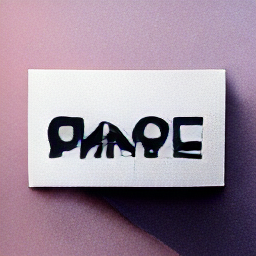

In [7]:
loop = asyncio.get_event_loop()
asyncio.set_event_loop(loop)
responses = loop.create_task(run_custom())